# ¡Hola, Juan David!  

Mi nombre es Carlos Ortiz, soy code reviewer de TripleTen y voy a revisar el proyecto que acabas de desarrollar.

Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión. 

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma: 


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>
¡Empecemos!

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np



## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
users= pd.read_csv('/datasets/megaline_users.csv')
calls= pd.read_csv('/datasets/megaline_calls.csv')
messages= pd.read_csv('/datasets/megaline_messages.csv')
internet= pd.read_csv('/datasets/megaline_internet.csv')
plans= pd.read_csv('/datasets/megaline_plans.csv')


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo con la importación de datos y de librerías.
</div>


## Preparar los datos

A continuación, se visualizan los datos para una comprensión inicial y se hacen las correcciones pertinentes.

In [3]:
display(users.head())

users.info()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [4]:
# se da formato de fecha a la columna churn_date y se dejan los valores ausentes
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

In [5]:
display(users.head())

users.info()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    object        
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


In [6]:
display(calls.head())

calls.info()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [7]:
#redondeo el tiempo de la llamada hacia arriba, debido a que la llamada se cobra por minutos
calls['duration'] = np.ceil(calls['duration'])

In [8]:
display(calls.head())

calls.info()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9.0
1,1000_145,1000,2018-12-27,14.0
2,1000_247,1000,2018-12-27,15.0
3,1000_309,1000,2018-12-28,6.0
4,1000_380,1000,2018-12-30,5.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [9]:
display(messages.head())

messages.info()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [10]:
display(internet.head())

internet.info()   

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [11]:
display(plans.head())

plans.info() 

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


## Tarifas

In [12]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas

plans.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [13]:
# Imprime una muestra de los datos para las tarifas

display(plans.head())

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


La base de datos de plans describe las tarifas de cada plan, por lo cual no es valido hacer correcciones o modificaciones a esta base de datos. Todos los datos están conforme a lo esperado. 

## Corregir datos

La base de datos de plans describe las tarifas, por lo cual no es valido hacer correcciones, modificaciones o enriquecer los datos. 

## Enriquecer los datos

Se agrega una nueva columna con las Gb incluidas en cada plan, para posteriores calculos y analisis.

In [14]:
#agrego una nueva columna con las GB incluidas en el Plan.
plans['gb_per_month_included']= plans['mb_per_month_included']/ 1024

In [15]:
display(plans)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


## Usuarios/as

In [16]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    object        
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


In [17]:
# Imprime una muestra de datos para usuarios

display(users.head())

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT


La base de datos nos presenta la información particular de cada usuario, el tipo de datos se corresponden con lo esperado excepto en la columna de reg_date a la cual se le debe dar formato de fecha. No presentamos valores ausentes que afecte el análisis de los datos.

### Corregir los datos

Es necesario cambiar el formato de la columna 'reg_date' a un formato de fecha.

In [18]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

### Enriquecer los datos

No es necesario enriquecer esta base de datos.

## Llamadas

In [19]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [20]:
# Imprime una muestra de datos para las llamadas

display(calls.head())

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9.0
1,1000_145,1000,2018-12-27,14.0
2,1000_247,1000,2018-12-27,15.0
3,1000_309,1000,2018-12-28,6.0
4,1000_380,1000,2018-12-30,5.0


La base de datos nuestra información sobre las llamadas, no presenta datos ausentes, es necesario cambiar el formato de la columna call_date debido que contiene una fecha y es necesario, para un posterior análisis crear una columna que nos indique el mes en el cual se realizo la llamada.

### Corregir los datos

Es necesario cambiar el formato de la columna 'call_date' a un formato de fecha.

In [21]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

### Enriquecer los datos

Se crea una nueva columna donde esta solo el mes de la fecha de la llamada. 

In [22]:
calls['month'] = calls['call_date'].dt.month

In [23]:
display(calls.head())
calls.info()

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9.0,12
1,1000_145,1000,2018-12-27,14.0,12
2,1000_247,1000,2018-12-27,15.0,12
3,1000_309,1000,2018-12-28,6.0,12
4,1000_380,1000,2018-12-30,5.0,12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
 4   month      137735 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.3+ MB


## Mensajes

In [24]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [25]:
# Imprime una muestra de datos para los mensajes
display(messages.head())

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


Se encuentra base de datos sobre los mensajes enviados por cada usuario y la fecha en que se envió. Se podría adicionar una nueva columna con el mes en que se realizo el mensaje.

### Corregir los datos

Es necesario cambiar el formato de la columna 'message_date' a un formato de fecha.

In [26]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

### Enriquecer los datos

Se crea una nueva columna donde esta solo el mes de la fecha del mensaje.

In [27]:
messages['month'] = messages['message_date'].dt.month

In [28]:
display(messages.head())

messages.info()

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   month         76051 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.3+ MB


## Internet

In [29]:
# Imprime la información general/resumida sobre el DataFrame de internet

internet.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [30]:
# Imprime una muestra de datos para el tráfico de internet

display(internet.head())


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


Se encuentra base de datos sobre la cantidad de internet usado por cada usuario y la fecha en que se envió. Se podría adicionar una nueva columna con el mes de cada sesión de internet. También es necesario cambiar el formato de la columna session_date a un formato de fecha.

### Corregir los datos

Es necesario cambiar el formato de la columna 'session_date' a un formato de fecha.

In [31]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

### Enriquecer los datos

Se crea una nueva columna donde esta solo el mes de la fecha de la session

In [32]:
internet['month'] = internet['session_date'].dt.month

In [33]:
display(internet.head())

internet.info()

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   month         104825 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 4.0+ MB


## Estudiar las condiciones de las tarifas

In [34]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

display(plans)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


## Agregar datos por usuario


In [35]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

llamadas_usuario = calls.groupby(['user_id', 'month'])['duration'].count().reset_index()

display(llamadas_usuario)

,user_id,month,duration
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [36]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

minutos_usuarios_mes = calls.groupby(['user_id', 'month'])['duration'].sum().reset_index()
display(minutos_usuarios_mes)


,user_id,month,duration
0,1000,12,124.0
1,1001,8,182.0
2,1001,9,315.0
3,1001,10,393.0
4,1001,11,426.0
...,...,...,...
2253,1498,12,339.0
2254,1499,9,346.0
2255,1499,10,385.0
2256,1499,11,308.0


In [37]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

mensajes_usuario = messages.groupby(['user_id', 'month'])['id'].count().reset_index()


display(mensajes_usuario)

,user_id,month,id
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [38]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

volumen_internet = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()

display(volumen_internet)

,user_id,month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83


In [39]:
#calculo la cantidad de Gb que el usuario gasta al mes.

volumen_internet['gb_used'] = np.ceil(volumen_internet['mb_used'] / 1024)
display(volumen_internet)

,user_id,month,mb_used,gb_used
0,1000,12,1901.47,2.0
1,1001,8,6919.15,7.0
2,1001,9,13314.82,14.0
3,1001,10,22330.49,22.0
4,1001,11,18504.30,19.0
...,...,...,...,...
2272,1498,12,23137.69,23.0
2273,1499,9,12984.76,13.0
2274,1499,10,19492.43,20.0
2275,1499,11,16813.83,17.0


In [40]:
# Fusiono los datos de llamadas, minutos, mensajes e Internet con base en user_id y month


datos_usuario = pd.merge(llamadas_usuario, minutos_usuarios_mes, on=['user_id', 'month'], how='outer')
datos_usuario = pd.merge(datos_usuario, mensajes_usuario, on=['user_id', 'month'], how='outer')
datos_usuario = pd.merge(datos_usuario, volumen_internet, on=['user_id', 'month'], how='outer')

datos_usuario.rename(columns={'duration_x': 'llamadas',
                              'duration_y': 'duracion_llamada',
                              'id': 'mensajes',
                              'mb_used': 'mb_mensuales', 
                              'gb_used': 'gb_mensuales'},inplace = True)
datos_usuario = datos_usuario.fillna(0)
display(datos_usuario)
datos_usuario.info()

,user_id,month,llamadas,duracion_llamada,mensajes,mb_mensuales,gb_mensuales
0,1000,12,16.0,124.0,11.0,1901.47,2.0
1,1001,8,27.0,182.0,30.0,6919.15,7.0
2,1001,9,49.0,315.0,44.0,13314.82,14.0
3,1001,10,65.0,393.0,53.0,22330.49,22.0
4,1001,11,64.0,426.0,36.0,18504.30,19.0
...,...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,61.0,13039.91,13.0
2289,1361,5,0.0,0.0,2.0,1519.69,2.0
2290,1482,10,0.0,0.0,2.0,0.00,0.0
2291,1108,12,0.0,0.0,0.0,233.17,1.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           2293 non-null   int64  
 1   month             2293 non-null   int64  
 2   llamadas          2293 non-null   float64
 3   duracion_llamada  2293 non-null   float64
 4   mensajes          2293 non-null   float64
 5   mb_mensuales      2293 non-null   float64
 6   gb_mensuales      2293 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 143.3 KB


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Muchas las gracias por la sugerencia. 
Agregue 'how=outer' y luego cambio los valores nulos por 0 para poder hacer los calculos necesarios despues.
</div>

In [41]:
# Añade la información de la tarifa
datos_usuario = pd.merge(datos_usuario, users[['user_id', 'plan']], on='user_id', how='left')

display(datos_usuario)

,user_id,month,llamadas,duracion_llamada,mensajes,mb_mensuales,gb_mensuales,plan
0,1000,12,16.0,124.0,11.0,1901.47,2.0,ultimate
1,1001,8,27.0,182.0,30.0,6919.15,7.0,surf
2,1001,9,49.0,315.0,44.0,13314.82,14.0,surf
3,1001,10,65.0,393.0,53.0,22330.49,22.0,surf
4,1001,11,64.0,426.0,36.0,18504.30,19.0,surf
...,...,...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,61.0,13039.91,13.0,surf
2289,1361,5,0.0,0.0,2.0,1519.69,2.0,surf
2290,1482,10,0.0,0.0,2.0,0.00,0.0,ultimate
2291,1108,12,0.0,0.0,0.0,233.17,1.0,ultimate


In [42]:
# añado la ciudad de cada usuario, para posteriores analisis
datos_usuario = pd.merge(datos_usuario, users[['user_id', 'city']], on='user_id', how='left')

display(datos_usuario)

,user_id,month,llamadas,duracion_llamada,mensajes,mb_mensuales,gb_mensuales,plan,city
0,1000,12,16.0,124.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8,27.0,182.0,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,9,49.0,315.0,44.0,13314.82,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,10,65.0,393.0,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,11,64.0,426.0,36.0,18504.30,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
...,...,...,...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,61.0,13039.91,13.0,surf,"Boston-Cambridge-Newton, MA-NH MSA"
2289,1361,5,0.0,0.0,2.0,1519.69,2.0,surf,"Birmingham-Hoover, AL MSA"
2290,1482,10,0.0,0.0,2.0,0.00,0.0,ultimate,"New York-Newark-Jersey City, NY-NJ-PA MSA"
2291,1108,12,0.0,0.0,0.0,233.17,1.0,ultimate,"Salt Lake City, UT MSA"


In [43]:
# Calcula el ingreso mensual para cada usuario
datos_usuario = datos_usuario.rename(columns= {'plan': 'plan_name'})

merged_usuario_tarifa = pd.merge(datos_usuario, plans, on='plan_name')

display(merged_usuario_tarifa )


,user_id,month,llamadas,duracion_llamada,mensajes,mb_mensuales,gb_mensuales,plan_name,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
0,1000,12,16.0,124.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70,7,0.01,0.01,30.0
1,1006,11,2.0,10.0,15.0,2068.37,3.0,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,30720,3000,70,7,0.01,0.01,30.0
2,1006,12,9.0,59.0,139.0,32118.82,32.0,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,30720,3000,70,7,0.01,0.01,30.0
3,1008,10,71.0,476.0,21.0,17106.99,17.0,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",1000,30720,3000,70,7,0.01,0.01,30.0
4,1008,11,63.0,446.0,37.0,23676.72,24.0,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",1000,30720,3000,70,7,0.01,0.01,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1194,12,0.0,0.0,56.0,31088.49,31.0,surf,"San Jose-Sunnyvale-Santa Clara, CA MSA",50,15360,500,20,10,0.03,0.03,15.0
2289,1349,10,0.0,0.0,76.0,13093.55,13.0,surf,"Boston-Cambridge-Newton, MA-NH MSA",50,15360,500,20,10,0.03,0.03,15.0
2290,1349,11,0.0,0.0,72.0,17128.26,17.0,surf,"Boston-Cambridge-Newton, MA-NH MSA",50,15360,500,20,10,0.03,0.03,15.0
2291,1349,12,0.0,0.0,61.0,13039.91,13.0,surf,"Boston-Cambridge-Newton, MA-NH MSA",50,15360,500,20,10,0.03,0.03,15.0


In [44]:
#hago el calculo de ingresos por cada usuario.
merged_usuario_tarifa['ingresos_mensuales'] = merged_usuario_tarifa.apply(lambda row: ((max(row['duracion_llamada'] - row['minutes_included'], 0) * row['usd_per_minute']) + (max(row['mensajes'] - row['messages_included'], 0) * row['usd_per_message']) + (max(row['gb_mensuales'] - row['gb_per_month_included'], 0)) * row['usd_per_gb']) + row['usd_monthly_pay'], axis=1)

display(merged_usuario_tarifa)

,user_id,month,llamadas,duracion_llamada,mensajes,mb_mensuales,gb_mensuales,plan_name,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,ingresos_mensuales
0,1000,12,16.0,124.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70,7,0.01,0.01,30.0,70.00
1,1006,11,2.0,10.0,15.0,2068.37,3.0,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,30720,3000,70,7,0.01,0.01,30.0,70.00
2,1006,12,9.0,59.0,139.0,32118.82,32.0,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,30720,3000,70,7,0.01,0.01,30.0,84.00
3,1008,10,71.0,476.0,21.0,17106.99,17.0,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",1000,30720,3000,70,7,0.01,0.01,30.0,70.00
4,1008,11,63.0,446.0,37.0,23676.72,24.0,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",1000,30720,3000,70,7,0.01,0.01,30.0,70.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1194,12,0.0,0.0,56.0,31088.49,31.0,surf,"San Jose-Sunnyvale-Santa Clara, CA MSA",50,15360,500,20,10,0.03,0.03,15.0,180.18
2289,1349,10,0.0,0.0,76.0,13093.55,13.0,surf,"Boston-Cambridge-Newton, MA-NH MSA",50,15360,500,20,10,0.03,0.03,15.0,20.78
2290,1349,11,0.0,0.0,72.0,17128.26,17.0,surf,"Boston-Cambridge-Newton, MA-NH MSA",50,15360,500,20,10,0.03,0.03,15.0,40.66
2291,1349,12,0.0,0.0,61.0,13039.91,13.0,surf,"Boston-Cambridge-Newton, MA-NH MSA",50,15360,500,20,10,0.03,0.03,15.0,20.33


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Se agrego una nueva columna al a la tabla de plans con la GB incluidas al mes,
las cual use para calcular las Gb usadas menos ls GB incliidas por mes.
</div>

In [45]:
# creo una data frame separado por cada plan, para posteriores analisis
usuarios_ultimate = merged_usuario_tarifa.loc[merged_usuario_tarifa['plan_name'] == 'ultimate']

display(usuarios_ultimate)

,user_id,month,llamadas,duracion_llamada,mensajes,mb_mensuales,gb_mensuales,plan_name,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,ingresos_mensuales
0,1000,12,16.0,124.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70,7,0.01,0.01,30.0,70.0
1,1006,11,2.0,10.0,15.0,2068.37,3.0,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,30720,3000,70,7,0.01,0.01,30.0,70.0
2,1006,12,9.0,59.0,139.0,32118.82,32.0,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,30720,3000,70,7,0.01,0.01,30.0,84.0
3,1008,10,71.0,476.0,21.0,17106.99,17.0,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",1000,30720,3000,70,7,0.01,0.01,30.0,70.0
4,1008,11,63.0,446.0,37.0,23676.72,24.0,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",1000,30720,3000,70,7,0.01,0.01,30.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,1204,12,0.0,0.0,78.0,36730.05,36.0,ultimate,"Chicago-Naperville-Elgin, IL-IN-WI MSA",1000,30720,3000,70,7,0.01,0.01,30.0,112.0
716,1224,6,0.0,0.0,5.0,2966.21,3.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70,7,0.01,0.01,30.0,70.0
717,1482,10,0.0,0.0,2.0,0.00,0.0,ultimate,"New York-Newark-Jersey City, NY-NJ-PA MSA",1000,30720,3000,70,7,0.01,0.01,30.0,70.0
718,1108,12,0.0,0.0,0.0,233.17,1.0,ultimate,"Salt Lake City, UT MSA",1000,30720,3000,70,7,0.01,0.01,30.0,70.0


In [46]:
usuarios_surf = merged_usuario_tarifa.loc[merged_usuario_tarifa['plan_name'] == 'surf']

display(usuarios_surf)

,user_id,month,llamadas,duracion_llamada,mensajes,mb_mensuales,gb_mensuales,plan_name,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,ingresos_mensuales
720,1001,8,27.0,182.0,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,15.0,20.00
721,1001,9,49.0,315.0,44.0,13314.82,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,15.0,20.00
722,1001,10,65.0,393.0,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,15.0,90.09
723,1001,11,64.0,426.0,36.0,18504.30,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,15.0,60.00
724,1001,12,56.0,412.0,44.0,19369.18,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,15.0,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1194,12,0.0,0.0,56.0,31088.49,31.0,surf,"San Jose-Sunnyvale-Santa Clara, CA MSA",50,15360,500,20,10,0.03,0.03,15.0,180.18
2289,1349,10,0.0,0.0,76.0,13093.55,13.0,surf,"Boston-Cambridge-Newton, MA-NH MSA",50,15360,500,20,10,0.03,0.03,15.0,20.78
2290,1349,11,0.0,0.0,72.0,17128.26,17.0,surf,"Boston-Cambridge-Newton, MA-NH MSA",50,15360,500,20,10,0.03,0.03,15.0,40.66
2291,1349,12,0.0,0.0,61.0,13039.91,13.0,surf,"Boston-Cambridge-Newton, MA-NH MSA",50,15360,500,20,10,0.03,0.03,15.0,20.33


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Gracias por las sugerencias y comentarios. Se hacen las correcciones sugeridas.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Todo corregido.
</div>

## Estudia el comportamiento de usuario

Se calculan algunas estadísticas descriptivas para los datos agregados y fusionados con el fin de mostrar un panorama general captado por los datos. Se presentan gráficos útiles para facilitar la comprensión. 

### Llamadas

In [47]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

promedio_duration_llamadas = merged_usuario_tarifa.groupby(['plan_name', 'month'])['duracion_llamada'].mean().reset_index()

<AxesSubplot:title={'center':'Duración promedio de llamadas por mes y plan'}, xlabel='month'>

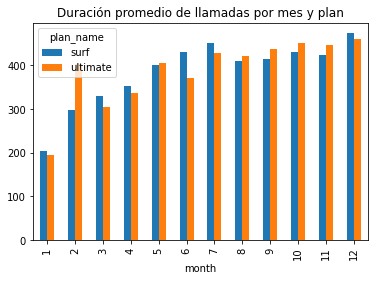

In [48]:
# Reorganizo promedio_duration_llamadas utilizando el método pivot() para tener columnas separadas para cada plan
grafica_pivot = promedio_duration_llamadas.pivot(index='month', columns='plan_name', values='duracion_llamada')

# Trazo un gráfico
grafica_pivot.plot.bar(title='Duración promedio de llamadas por mes y plan')

In [49]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
total_minutos = merged_usuario_tarifa.groupby(['plan_name', 'month'])['duracion_llamada'].sum().reset_index()

array([<AxesSubplot:title={'center':'surf'}>,
       <AxesSubplot:title={'center':'ultimate'}>], dtype=object)

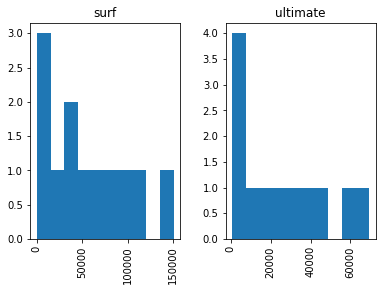

In [50]:
#histograma
total_minutos.hist(column='duracion_llamada', by='plan_name')

In [51]:
# Calcula la media y la varianza de la duración mensual de llamadas.

estadisticas_llamadas = merged_usuario_tarifa.groupby('month')['duracion_llamada'].agg(['mean', 'var']).reset_index()

estadisticas_llamadas_ultimate = usuarios_ultimate.groupby('month')['duracion_llamada'].agg(['mean', 'var']).reset_index()

estadisticas_llamadas_surf = usuarios_surf.groupby('month')['duracion_llamada'].agg(['mean', 'var']).reset_index()

display(estadisticas_llamadas)

display(estadisticas_llamadas_ultimate)

display(estadisticas_llamadas_surf)

,month,mean,var
0,1,196.666667,13135.866667
1,2,343.437500,61567.329167
2,3,321.171429,43378.499160
3,4,347.197183,45620.531992
4,5,401.405660,54950.510063
5,6,411.604167,45086.240822
6,7,442.472222,64525.781347
7,8,413.562232,53926.747188
8,9,421.378571,49735.899181
9,10,436.221574,52829.190527


,month,mean,var
0,1,193.500000,16572.333333
1,2,403.142857,76889.476190
2,3,304.250000,61984.931818
3,4,336.857143,34888.928571
4,5,406.241379,43841.046798
5,6,370.957447,42503.563367
6,7,427.067797,72563.374635
7,8,421.436620,53645.506640
8,9,437.511628,57070.464569
9,10,450.735849,54261.910512


,month,mean,var
0,1,203.000000,15842.000000
1,2,297.000000,52226.500000
2,3,330.000000,35809.363636
3,4,351.540000,50866.743265
4,5,399.584416,59754.219754
5,6,431.298969,45592.628436
6,7,449.983471,61005.099725
7,8,410.111111,54344.645963
8,9,414.226804,46595.958656
9,10,429.729958,52278.664056


<AxesSubplot:title={'center':'duracion_llamada'}, xlabel='month'>

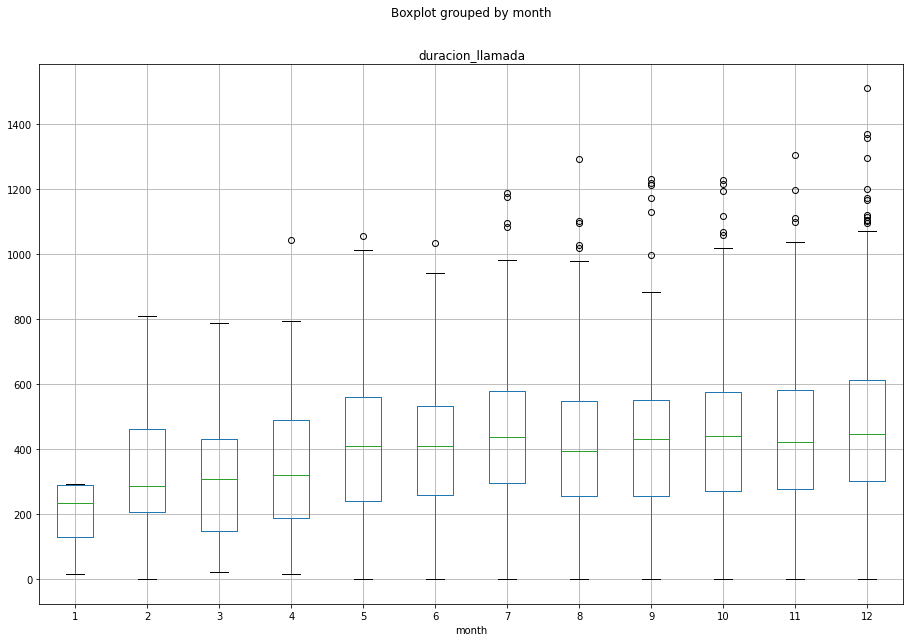

In [52]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

merged_usuario_tarifa.boxplot(column='duracion_llamada', by='month', figsize=(15, 10))

<AxesSubplot:title={'center':'duracion_llamada'}, xlabel='month'>

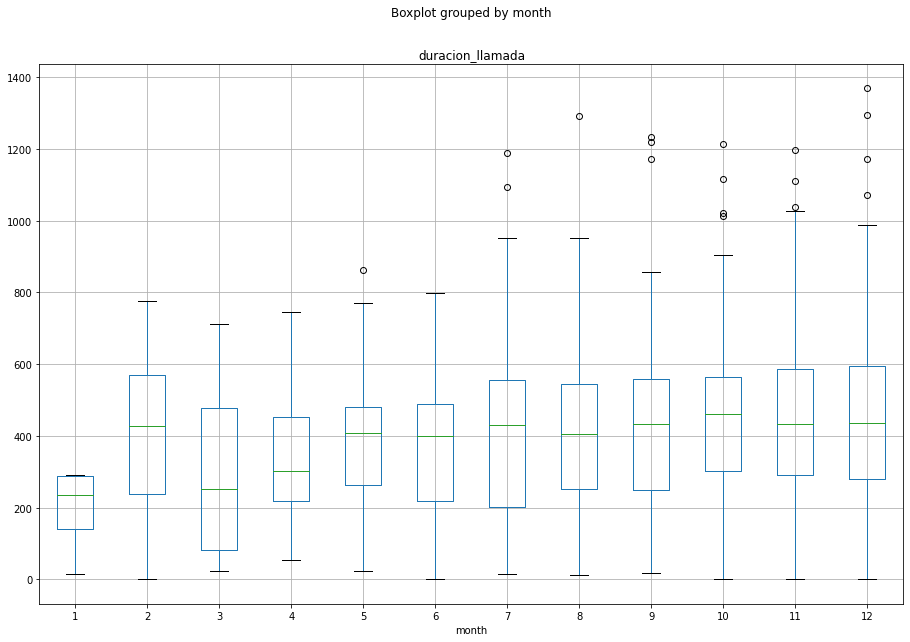

In [53]:
usuarios_ultimate.boxplot(column='duracion_llamada', by='month', figsize=(15, 10))

<AxesSubplot:title={'center':'duracion_llamada'}, xlabel='month'>

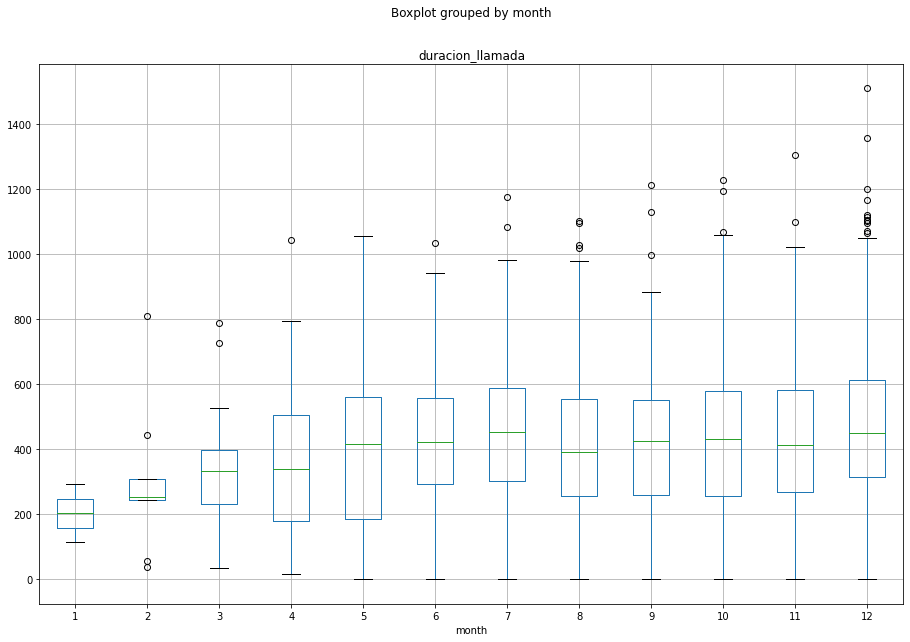

In [54]:
usuarios_surf.boxplot(column='duracion_llamada', by='month', figsize=(15, 10))

Los usuarios en general tienen un comportamiento muy parecido a la hora de hacer llamadas, sin importar el plan, solo tenemos algunos casos donde algunos usuarios presentan comportamientos atípicos a la hora de realizar llamadas. La duración promedio de las llamadas es muy parecida entre los dos planes.

### Mensajes

In [55]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

mensajes_mes = merged_usuario_tarifa.groupby(['plan_name', 'month'])['mensajes'].mean().reset_index()

<AxesSubplot:title={'center':'Cantidad de mensajes por mes y plan'}, xlabel='month'>

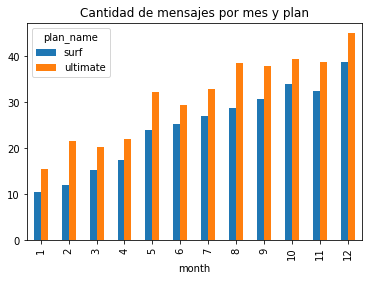

In [56]:
# Reorganizo mensajes_mes utilizando el método pivot() para tener columnas separadas para cada plan
grafica_pivot = mensajes_mes.pivot(index='month', columns='plan_name', values='mensajes')

# Trazo un gráfico
grafica_pivot.plot.bar(title='Cantidad de mensajes por mes y plan')

In [57]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan.
total_mensajes = merged_usuario_tarifa.groupby(['plan_name', 'month'])['mensajes'].sum().reset_index()

array([<AxesSubplot:title={'center':'surf'}>,
       <AxesSubplot:title={'center':'ultimate'}>], dtype=object)

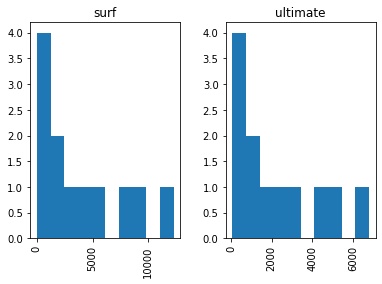

In [58]:
#histograma
total_mensajes.hist(column='mensajes', by='plan_name', bins=10)

In [59]:
# Calcula la media y la varianza mensual de los mensajes.

estadisticas_mensajes = merged_usuario_tarifa.groupby('month')['mensajes'].agg(['mean', 'var']).reset_index()

estadisticas_mensajes_ultimate = usuarios_ultimate.groupby('month')['mensajes'].agg(['mean', 'var']).reset_index()

estadisticas_mensajes_surf = usuarios_surf.groupby('month')['mensajes'].agg(['mean', 'var']).reset_index()

display(estadisticas_mensajes)

display(estadisticas_mensajes_ultimate)

display(estadisticas_mensajes_surf)


,month,mean,var
0,1,13.833333,238.966667
1,2,16.187500,421.229167
2,3,16.971429,441.734454
3,4,18.774648,511.148491
4,5,26.226415,972.291105
5,6,26.618056,893.706245
6,7,28.933333,938.051397
7,8,31.733906,1095.446130
8,9,32.953571,1025.442281
9,10,35.571429,1261.771930


,month,mean,var
0,1,15.500000,313.666667
1,2,21.571429,478.285714
2,3,20.250000,654.386364
3,4,22.047619,544.147619
4,5,32.103448,1297.310345
5,6,29.340426,857.620722
6,7,32.830508,960.488019
7,8,38.478873,1196.367404
8,9,37.895349,1050.918331
9,10,39.443396,1221.106289


,month,mean,var
0,1,10.500000,220.500000
1,2,12.000000,386.000000
2,3,15.260870,346.565217
3,4,17.400000,501.591837
4,5,24.012987,847.197198
5,6,25.298969,914.920103
6,7,27.033058,923.915565
7,8,28.777778,1029.515528
8,9,30.762887,1003.829496
9,10,33.839662,1275.465708


<AxesSubplot:title={'center':'mensajes'}, xlabel='month'>

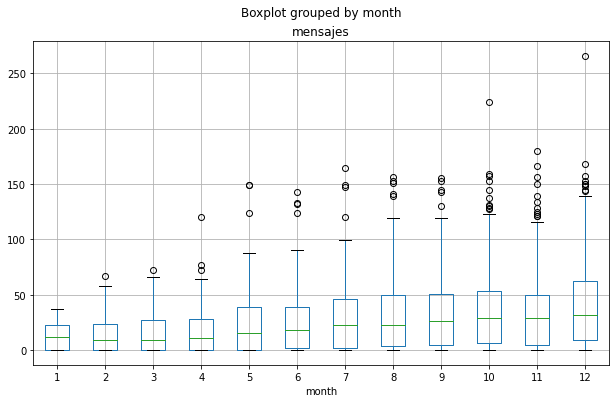

In [60]:
merged_usuario_tarifa.boxplot(column='mensajes', by='month', figsize=(10, 6))

<AxesSubplot:title={'center':'mensajes'}, xlabel='month'>

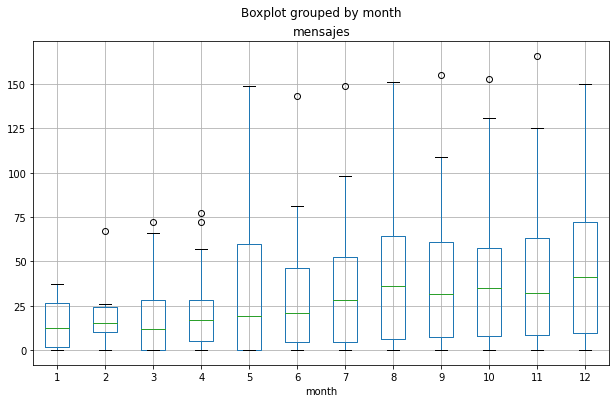

In [61]:
usuarios_ultimate.boxplot(column='mensajes', by='month', figsize=(10, 6))

<AxesSubplot:title={'center':'mensajes'}, xlabel='month'>

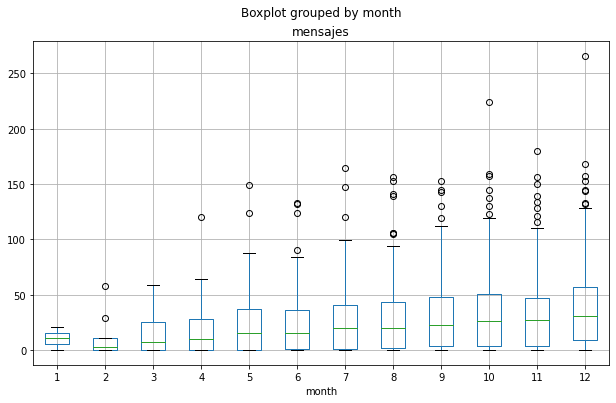

In [62]:
usuarios_surf.boxplot(column='mensajes', by='month', figsize=(10, 6))

Encontramos que los usuarios del plan ultimate en promedio tienden a enviar más mensajes. Pero encontramos una mayor cantidad de valores atípicos de envío de mensaje por parte de los usuarios del plan surf

### Internet

In [63]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

internet_mes = merged_usuario_tarifa.groupby(['plan_name', 'month'])['gb_mensuales'].mean().reset_index()

<AxesSubplot:title={'center':'Cantidad de tráfico de Internet por mes y plan'}, xlabel='month'>

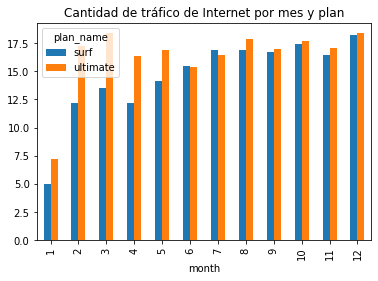

In [64]:
# Reorganizo internet_mes utilizando el método pivot() para tener columnas separadas para cada plan
grafica_pivot = internet_mes.pivot(index='month', columns='plan_name', values='gb_mensuales')

# Trazo un gráfico
grafica_pivot.plot.bar(title='Cantidad de tráfico de Internet por mes y plan')

In [65]:
# Compara la cantidad de  Internet que necesitan los usuarios de cada plan.
total_internet = merged_usuario_tarifa.groupby(['plan_name', 'month'])['gb_mensuales'].sum().reset_index()


array([<AxesSubplot:title={'center':'surf'}>,
       <AxesSubplot:title={'center':'ultimate'}>], dtype=object)

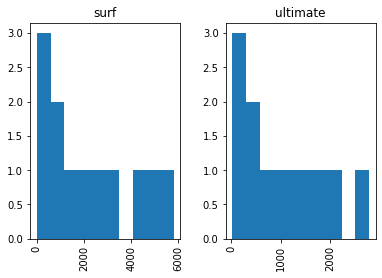

In [66]:
total_internet.hist(column='gb_mensuales', by='plan_name', bins=10)

In [67]:
# Calcula la media y la varianza mensual del internet.

estadisticas_internet = merged_usuario_tarifa.groupby('month')['mb_mensuales'].agg(['mean', 'var']).reset_index()

estadisticas_internet_ultimate = usuarios_ultimate.groupby('month')['mb_mensuales'].agg(['mean', 'var']).reset_index()

estadisticas_internet_surf = usuarios_surf.groupby('month')['mb_mensuales'].agg(['mean', 'var']).reset_index()

<AxesSubplot:title={'center':'gb_mensuales'}, xlabel='month'>

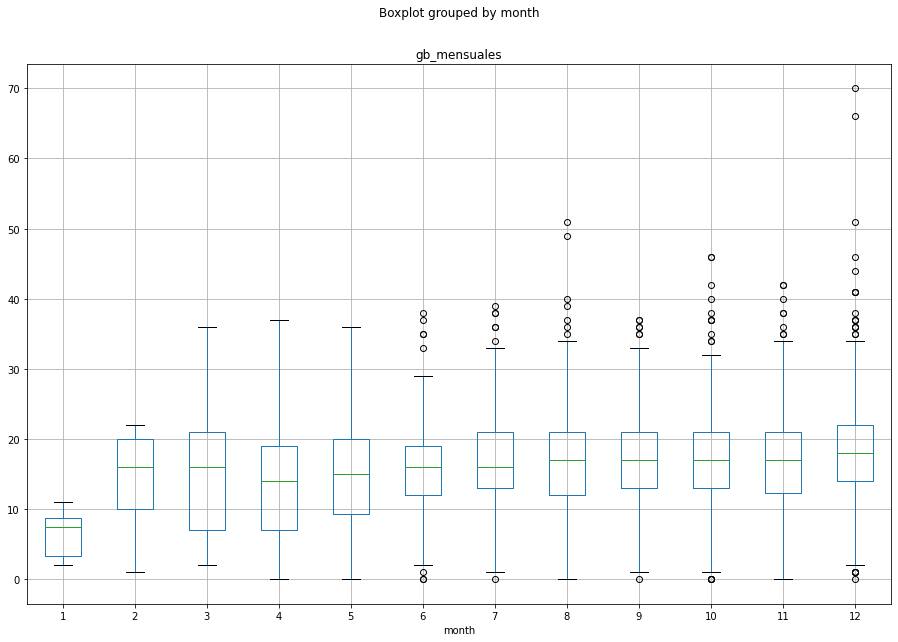

In [68]:
merged_usuario_tarifa.boxplot(column='gb_mensuales', by='month', figsize=(15, 10))

<AxesSubplot:title={'center':'gb_mensuales'}, xlabel='month'>

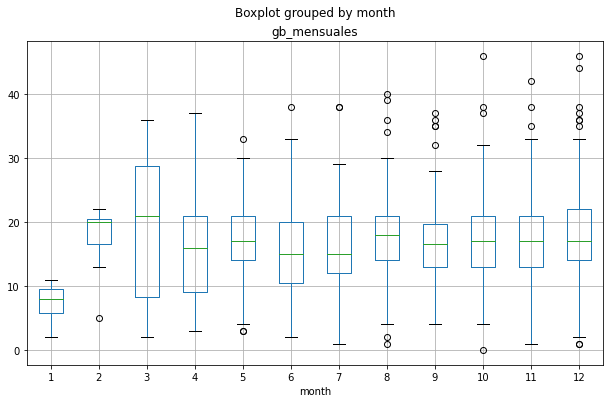

In [69]:
usuarios_ultimate.boxplot(column='gb_mensuales', by='month', figsize=(10, 6))

<AxesSubplot:title={'center':'gb_mensuales'}, xlabel='month'>

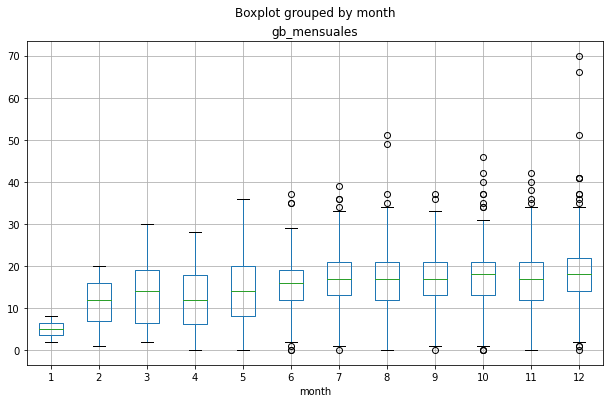

In [70]:
usuarios_surf.boxplot(column='gb_mensuales', by='month', figsize=(10, 6))

El consumo de internet en promedio es igual en los dos planes, exceptuando los meses de febrero y marzo donde los usuarios del plan ultimate sobrepasaron en mucho a los usuarios de surf.

## Ingreso

In [71]:
# Compara la cantidad de ingreso por usuarios por plan

ingresos_mes = merged_usuario_tarifa.groupby(['plan_name', 'month'])['ingresos_mensuales'].mean().reset_index()

<AxesSubplot:title={'center':'Cantidad de tráfico de Ingresos por mes y plan'}, xlabel='month'>

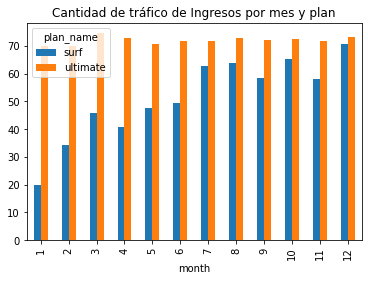

In [72]:
# Reorganizo ingresos_mes utilizando el método pivot() para tener columnas separadas para cada plan
grafica_pivot = ingresos_mes.pivot(index='month', columns='plan_name', values='ingresos_mensuales')

# Trazo un gráfico
grafica_pivot.plot.bar(title='Cantidad de tráfico de Ingresos por mes y plan')

In [73]:
# Compara el ingreso mensuales que necesitan los usuarios de cada plan.
total_ingresos = merged_usuario_tarifa.groupby(['plan_name', 'month'])['ingresos_mensuales'].sum().reset_index()

array([<AxesSubplot:title={'center':'surf'}>,
       <AxesSubplot:title={'center':'ultimate'}>], dtype=object)

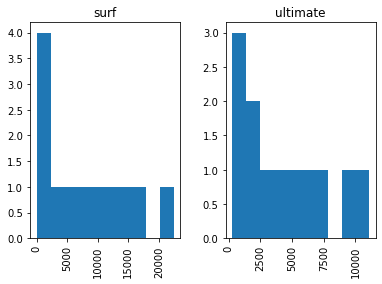

In [74]:
total_ingresos.hist(column='ingresos_mensuales', by='plan_name')

In [75]:
# Calcula la media y la varianza mensual de los ingresos.

estadisticas_ingresos = merged_usuario_tarifa.groupby('month')['ingresos_mensuales'].agg(['mean', 'var']).reset_index()

estadisticas_ingresos_ultimate = usuarios_ultimate.groupby('month')['ingresos_mensuales'].agg(['mean', 'var']).reset_index()

eestadisticas_ingresos_surf = usuarios_surf.groupby('month')['ingresos_mensuales'].agg(['mean', 'var']).reset_index()



<AxesSubplot:title={'center':'ingresos_mensuales'}, xlabel='month'>

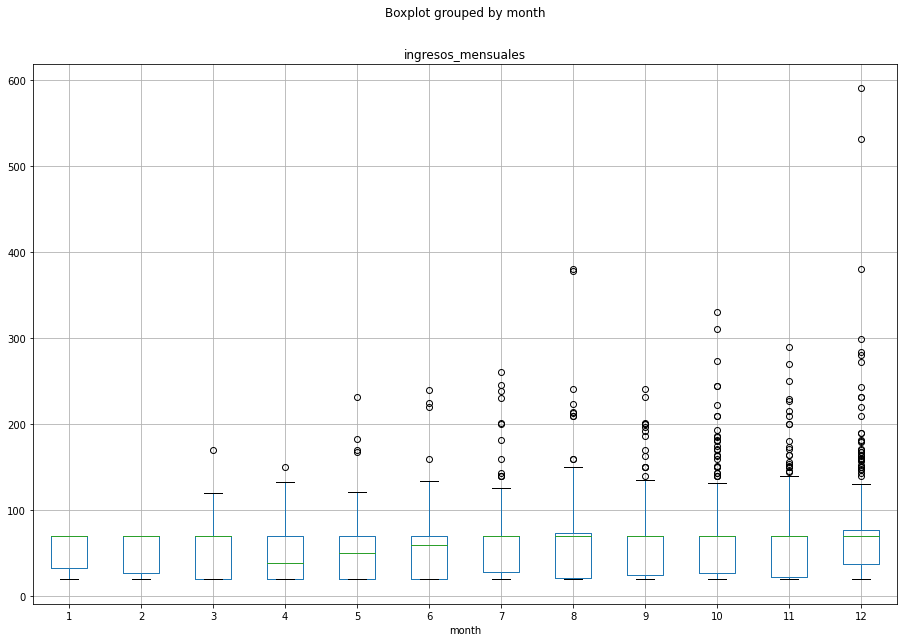

In [76]:
merged_usuario_tarifa.boxplot(column='ingresos_mensuales', by='month', figsize=(15, 10))



<AxesSubplot:title={'center':'ingresos_mensuales'}, xlabel='month'>

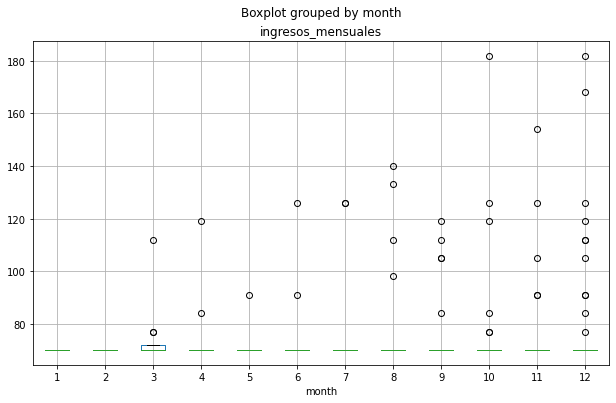

In [77]:
usuarios_ultimate.boxplot(column='ingresos_mensuales', by='month', figsize=(10, 6))

<AxesSubplot:title={'center':'ingresos_mensuales'}, xlabel='month'>

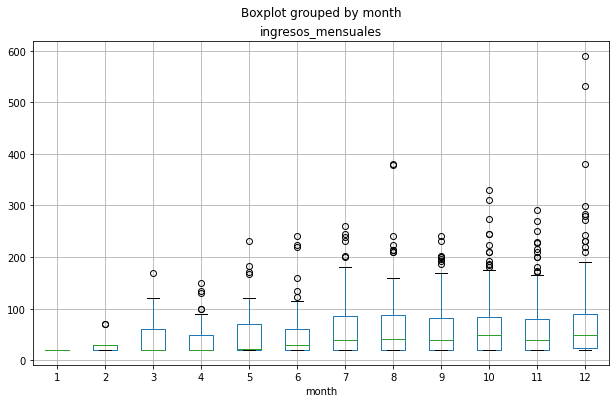

In [78]:
usuarios_surf.boxplot(column='ingresos_mensuales', by='month', figsize=(10, 6))

El ingreso de los planes varia, se puede ver in ingreso adicional mayor en el plan surf, si bien en los dos vemos usuarios que sobre pasan su plan, son mas los que sobre pasan el plan y generan mayores ingresos los usuarios del plan surf.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo con este análisis gráfico. 
</div>


## Prueba las hipótesis estadísticas

Hipótesis nula: los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf son iguales.

Hipótesis alternativa: los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf son diferentes.

In [79]:
# Prueba las hipótesis

# Obtengo los ingresos promedio por plan
ingresos_ultimate = merged_usuario_tarifa.loc[merged_usuario_tarifa['plan_name'] == 'ultimate', 'ingresos_mensuales']
ingresos_surf = merged_usuario_tarifa.loc[merged_usuario_tarifa['plan_name'] == 'surf', 'ingresos_mensuales']


# Realizo la prueba t de dos muestras
t_statistic, p_value = st.ttest_ind(ingresos_ultimate, ingresos_surf)

In [80]:
display(f"T-estadística: {t_statistic}")
display(f"Valor de p: {p_value}")

'T-estadística: 5.568949166552807'

'Valor de p: 2.862674510698644e-08'

Dado que el valor p es MENOR que un nivel de significancia (0.05), se RECHAZA la hipótesis nula de que los ingresos promedio son iguales para los dos grupos y por ende se ACEPTA la hipotesis alterativa que los ingresos promedio cambian segun el plan.

Hipótesis nula: el ingreso promedio de los usuarios del área NY-NJ es igual al de los usuarios de otras regiones.

Hipótesis altermativa: el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
A partir de las correciones de la tabla 'Valor de p: 2.862674510698644e-08' lo cual nos indica que la Hipótesis nula: los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf son iguales. debe ser ACEPTADA.
 
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
A partir de las correciones de la tabla 'Valor de p: 2.862674510698644e-08' lo cual nos indica que la Hipótesis nula: los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf son iguales. debe ser RECHAZADA.
 
</div>

In [81]:
# Prueba las hipótesis

# Obtener los ingresos mensuales del área NY-NJ y de otras regiones
ingresos_ny_nj = merged_usuario_tarifa.loc[merged_usuario_tarifa['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA', 'ingresos_mensuales']
ingresos_otras_regiones = merged_usuario_tarifa.loc[merged_usuario_tarifa['city'] != 'NY-NJ', 'ingresos_mensuales']

# Realizar la prueba t de dos muestras
t_statistic, p_value = st.ttest_ind(ingresos_ny_nj, ingresos_otras_regiones)

# Imprimir los resultados
print(f"T-estadística: {t_statistic}")
print(f"Valor de p: {p_value}")

T-estadística: -1.7251876608144745
Valor de p: 0.08460946064477248


Dado que el valor p mayor que un nivel de significancia (0.05), se ACEPTA la hipótesis nula de que los el ingreso promedio de los usuarios del área NY-NJ es igual al de los usuarios de otras regiones.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo con estas pruebas de hipótesis. Es posible que las conclusiones cambien a partir de lo mencionado anteriormente.
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Veo que el valor P de la hipótesis de los ingresos cambio significativamente por lo cual corrijo la conclusión. Aceptando la hipótesis nula. 
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Dado que el valor p mayor que un nivel de significancia (0.05), se ACEPTA la hipótesis nula de que los el ingreso promedio de los usuarios del área NY-NJ es igual al de los usuarios de otras regiones. 
</div>

## Conclusión general

Relación entre las bases de datos: Se reciben 5 bases de datos que pueden ser relacionadas entre sí utilizando el campo user_id. Esto nos permite obtener información más completa y detallada sobre los usuarios. Antes de crear una base de datos nueva fusionando parte de las anteriores y agregando algunos cálculos, fue necesario cambiar algunos formatos y redondear algunas cifras como la duración de las llamadas.

Comportamiento de los usuarios en general: 

Los usuarios en general tienen un comportamiento muy similar a la hora de realizar llamadas, independientemente del plan. Sin embargo, existen algunos casos en los que algunos usuarios presentan comportamientos atípicos en cuanto a la duración de las llamadas.

La duración promedio de las llamadas es similar en ambos planes. Esto indica que no hay una diferencia significativa en cuanto a la duración de las llamadas entre los usuarios de los dos planes.

Los usuarios del plan ultimate tienden a enviar más mensajes en promedio. Sin embargo, también se encuentran algunos valores atípicos en el envío de mensajes por parte de los usuarios del plan surf.

El consumo de internet en promedio es similar en ambos planes, excepto en los meses de febrero y marzo, donde los usuarios del plan ultimate superaron ampliamente a los usuarios del plan surf.

Los ingresos varían entre los dos planes. Se observa un ingreso adicional mayor en el plan surf. Aunque en ambos planes hay usuarios que exceden su plan, son más los que exceden el plan y generan mayores ingresos en el plan surf.

Al plantear nuestras hipótesis y verificarlas mediante una prueba t de dos muestras encontramos que:

Ingresos promedio en diferentes regiones: Según el análisis de hipótesis, se acepta la hipótesis alternativa de que los ingresos promedio de los usuarios del área NY-NJ son diferentes a los de otras regiones. Esto indica que existen diferencias significativas en los ingresos promedio entre estas dos áreas geográficas.

Ingresos promedio según el plan: De acuerdo con el análisis de hipótesis, se puede rechazar la hipótesis nula de que los ingresos promedio son iguales para los dos grupos (plan ultimate y plan surf). Por lo tanto, se acepta la hipótesis alternativa de que los ingresos promedio varían según el plan.


<div class="alert alert-block alert-danger">
    
# Comentarios generales
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo, Juan David. Debemos corregir la construcción de la tabla de consumo antes de proseguir con tu revisión. He dejado comentarios a lo largo del documento para ello.
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Gracias por las sugerencias y comentarios. Se hacen las correcciones sugeridas en la tabla de consumo al calcular la tarifa. A partir de esto cambia uno de los valores P y por ende las conclusiones.
</div>

<div class="alert alert-block alert-danger">
    
# Comentarios generales
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Hola, Juan David. Has corregido la tabla y hemos podido continuar con la revisión. Debemos trabajar en las conclusiones relacionadas con las pruebas de hipótesis.
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Gracias por las sugerencias y comentarios. Se cambian las conclusiones de las Hipotesis.
</div>

<div class="alert alert-block alert-danger">
    
# Comentarios generales
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Hola, Juan David. Dejé una anotación adicional.
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Gracias por las sugerencias y comentarios. Se cambian las conclusiones de las Hipotesis. No habia caido en cuenta del exponencial del valor p
</div>

<div class="alert alert-block alert-success">
    
# Comentarios generales
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Todo corregido. Has aprobado un nuevo proyecto. ¡Felicitaciones!
</div>